TSP Using Metaheuristic Algorithms

Problem Description  
The Traveling Salesperson Problem (TSP) is a classic combinatorial optimization problem. It is formulated as follows:  

Given a set of cities and the distances between each pair of them, the goal is to find the shortest route that visits   each city exactly once and returns to the starting point.  
 
TSP is an NP-hard problem, meaning there is no efficient exact algorithm to solve it for large numbers of cities.   However, metaheuristic algorithms are powerful strategies that can approximate solutions in a reasonable time. 

Tasks  
Problem Formulation  
Select a TSP instance from the TSPLIB. We will use the berlin52.tsp instance (a set of 52 cities in Berlin).  

Download the instance from the following link:   

berlin52.tsp  

## Simulated annealing  
simula el recocido del acero
con cada iteración reduce el rango de exploracion de opciones

In [19]:
import random
import math
import matplotlib.pyplot as plt
import tsplib95
import numpy as np

##?
def load_tsp(filename):
    problem = tsplib95.load(filename)
    nodes = list(problem.get_nodes())
    distance_matrix = np.array([[problem.get_weight(i, j) for j in nodes] for i in nodes])
    return nodes, distance_matrix

nodes, distance_matrix = load_tsp("berlin52.tsp")
#--------------------------------------------
def calculate_cost(tour, distance_matrix):
    return sum(distance_matrix[tour[i], tour[i+1]] for i in range(len(tour)-1)) + distance_matrix[tour[-1], tour[0]]

def simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iter):
    n = len(distance_matrix)
    current_tour = list(range(n))
    random.shuffle(current_tour)
    current_cost = calculate_cost(current_tour, distance_matrix)
    best_tour = current_tour
    best_cost = current_cost
    
    temperature = initial_temp
    
    for _ in range(max_iter):
        # Generate a neighboring solution
        i, j = random.sample(range(n), 2)
        neighbor_tour = current_tour[:]
        neighbor_tour[i], neighbor_tour[j] = neighbor_tour[j], neighbor_tour[i]
        neighbor_cost = calculate_cost(neighbor_tour, distance_matrix)
        
        # Accept or reject the neighbor
        if neighbor_cost < current_cost or random.random() < math.exp(-(neighbor_cost - current_cost) / temperature):
            current_tour = neighbor_tour
            current_cost = neighbor_cost
            
        # Update the best solution
        if current_cost < best_cost:
            best_tour = current_tour
            best_cost = current_cost
        
        # Decrease the temperature
        temperature *= cooling_rate
    
    return best_tour, best_cost

# parametrossssss
initial_temp = 1000 #cantidad de opciones iniciales
cooling_rate = 0.8 #disminucion de opciones con el tiempo
max_iter = 1000 #mejores resultados alrededor de los 10000 

best_tour, best_cost = simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iter)
print("Best Tour:", best_tour)
print("Best Cost:", best_cost)

Best Tour: [14, 23, 33, 43, 49, 22, 12, 51, 13, 46, 34, 38, 18, 44, 35, 36, 0, 30, 20, 29, 1, 6, 41, 2, 21, 31, 37, 27, 25, 26, 11, 5, 45, 15, 28, 19, 17, 16, 40, 8, 9, 32, 10, 50, 3, 47, 24, 42, 7, 48, 39, 4]
Best Cost: 13473


In [3]:

# Cargar el archivo .tsp
problem = tsplib95.load("berlin52.tsp")

# Verificar si el archivo contiene coordenadas
if hasattr(problem, 'node_coords') and problem.node_coords is not None:
    print("Coordenadas encontradas:")
    for node, coord in problem.node_coords.items():
        print(f"Ciudad {node}: Coordenadas {coord}")
else:
    print("El archivo no contiene coordenadas.")
problem.node_coords



Coordenadas encontradas:
Ciudad 1: Coordenadas [565.0, 575.0]
Ciudad 2: Coordenadas [25.0, 185.0]
Ciudad 3: Coordenadas [345.0, 750.0]
Ciudad 4: Coordenadas [945.0, 685.0]
Ciudad 5: Coordenadas [845.0, 655.0]
Ciudad 6: Coordenadas [880.0, 660.0]
Ciudad 7: Coordenadas [25.0, 230.0]
Ciudad 8: Coordenadas [525.0, 1000.0]
Ciudad 9: Coordenadas [580.0, 1175.0]
Ciudad 10: Coordenadas [650.0, 1130.0]
Ciudad 11: Coordenadas [1605.0, 620.0]
Ciudad 12: Coordenadas [1220.0, 580.0]
Ciudad 13: Coordenadas [1465.0, 200.0]
Ciudad 14: Coordenadas [1530.0, 5.0]
Ciudad 15: Coordenadas [845.0, 680.0]
Ciudad 16: Coordenadas [725.0, 370.0]
Ciudad 17: Coordenadas [145.0, 665.0]
Ciudad 18: Coordenadas [415.0, 635.0]
Ciudad 19: Coordenadas [510.0, 875.0]
Ciudad 20: Coordenadas [560.0, 365.0]
Ciudad 21: Coordenadas [300.0, 465.0]
Ciudad 22: Coordenadas [520.0, 585.0]
Ciudad 23: Coordenadas [480.0, 415.0]
Ciudad 24: Coordenadas [835.0, 625.0]
Ciudad 25: Coordenadas [975.0, 580.0]
Ciudad 26: Coordenadas [1215.0,

{1: [565.0, 575.0],
 2: [25.0, 185.0],
 3: [345.0, 750.0],
 4: [945.0, 685.0],
 5: [845.0, 655.0],
 6: [880.0, 660.0],
 7: [25.0, 230.0],
 8: [525.0, 1000.0],
 9: [580.0, 1175.0],
 10: [650.0, 1130.0],
 11: [1605.0, 620.0],
 12: [1220.0, 580.0],
 13: [1465.0, 200.0],
 14: [1530.0, 5.0],
 15: [845.0, 680.0],
 16: [725.0, 370.0],
 17: [145.0, 665.0],
 18: [415.0, 635.0],
 19: [510.0, 875.0],
 20: [560.0, 365.0],
 21: [300.0, 465.0],
 22: [520.0, 585.0],
 23: [480.0, 415.0],
 24: [835.0, 625.0],
 25: [975.0, 580.0],
 26: [1215.0, 245.0],
 27: [1320.0, 315.0],
 28: [1250.0, 400.0],
 29: [660.0, 180.0],
 30: [410.0, 250.0],
 31: [420.0, 555.0],
 32: [575.0, 665.0],
 33: [1150.0, 1160.0],
 34: [700.0, 580.0],
 35: [685.0, 595.0],
 36: [685.0, 610.0],
 37: [770.0, 610.0],
 38: [795.0, 645.0],
 39: [720.0, 635.0],
 40: [760.0, 650.0],
 41: [475.0, 960.0],
 42: [95.0, 260.0],
 43: [875.0, 920.0],
 44: [700.0, 500.0],
 45: [555.0, 815.0],
 46: [830.0, 485.0],
 47: [1170.0, 65.0],
 48: [830.0, 61

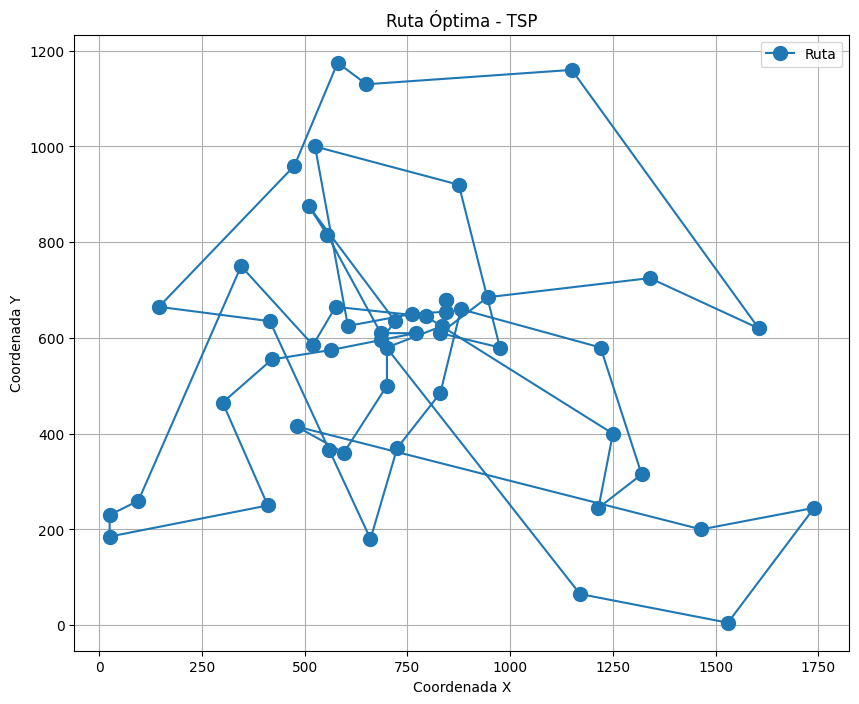

In [20]:
def plot_tour(nodes, distance_matrix, tour):
    """
    Grafica las ciudades y la ruta óptima.
    
    Parameters:
    - nodes: Lista de nodos (índices de las ciudades).
    - distance_matrix: Matriz de distancias.
    - tour: Lista que representa el recorrido óptimo.
    """
    # Obtener las coordenadas de las ciudades (si están definidas en la matriz de distancias)
    if hasattr(problem, 'node_coords'):
        
        coords = [problem.node_coords [node] for node in nodes]
        
    else: 
        raise ValueError("No se encontraron coordenadas en la matriz de distancias.")
    
    # Ordenar las coordenadas según el tour
    tour_coords = [coords[i] for i in tour]
    tour_coords.append(tour_coords[0])  # Cerrar el ciclo
    
    # Separar coordenadas X e Y
    x, y = zip(*tour_coords)
    
    # Graficar
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, '-o', markersize=10, label="Ruta")
    plt.title("Ruta Óptima - TSP")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(True)
    plt.legend()
    plt.show()

# Uso del código
# Asumiendo que nodes, distance_matrix, y best_tour están definidos:
plot_tour(nodes, problem, best_tour)

temporal SA code